In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [5]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [9]:
df_train["Product_Category_2_imp"] = np.where(df_train.Product_Category_2.isnull(), 1, 0)
df_train["Product_Category_3_imp"] = np.where(df_train.Product_Category_3.isnull(), 1, 0)

In [10]:
df_train.Product_Category_2.fillna(df_train.Product_Category_2.mode()[0], inplace= True)
df_train.Product_Category_3.fillna(df_train.Product_Category_3.mode()[0], inplace= True)

In [11]:
df_test["Product_Category_2_imp"] = np.where(df_test.Product_Category_2.isnull(), 1, 0)
df_test["Product_Category_3_imp"] = np.where(df_test.Product_Category_3.isnull(), 1, 0)

In [12]:
df_test.Product_Category_2.fillna(df_test.Product_Category_2.mode()[0], inplace= True)
df_test.Product_Category_3.fillna(df_test.Product_Category_3.mode()[0], inplace= True)

In [13]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_2_imp,Product_Category_3_imp
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370,1,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422,1,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057,0,1
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969,1,1


In [14]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_Category_2_imp,Product_Category_3_imp
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,16.0,0,1
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,16.0,0,1
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,16.0,0,1
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,16.0,0,1
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,0,0


In [15]:
df_train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Product_Category_2_imp        0
Product_Category_3_imp        0
dtype: int64

In [16]:
df_test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Product_Category_2_imp        0
Product_Category_3_imp        0
dtype: int64

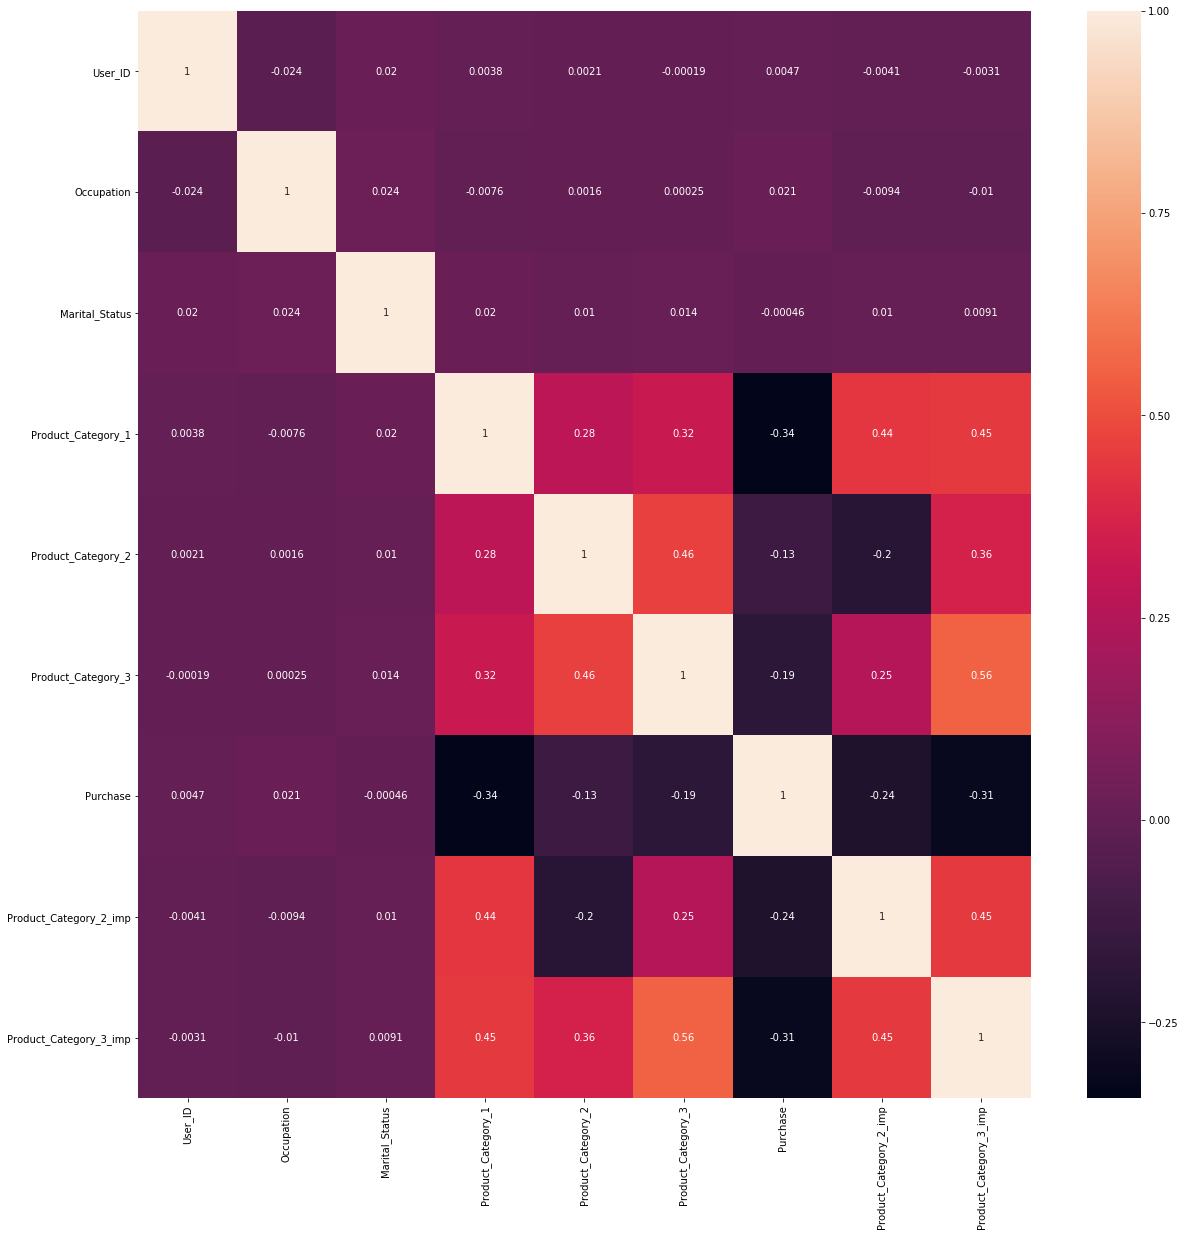

In [17]:
# For better size heatmap is plotted larger
corrmat = df_train.corr(method = "spearman")
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True)

In [18]:
df_train['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [19]:
df_train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [20]:
df_train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [21]:
print(df_train['Product_Category_1'].unique())
print(df_train['Product_Category_2'].unique())
print(df_train['Product_Category_3'].unique())

[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[ 8.  6. 14.  2. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[16. 14. 17.  5.  4. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [22]:
df_train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
df_train['User_ID'] = df_train['User_ID'] - 1000000
df_test['User_ID'] = df_test['User_ID'] - 1000000

enc = LabelEncoder()
df_train['User_ID'] = enc.fit_transform(df_train['User_ID'])
df_test['User_ID'] = enc.transform(df_test['User_ID'])
# df_train.drop('User_ID', axis = 1)
# df_test.drop('User_ID', axis = 1)

In [24]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_2_imp,Product_Category_3_imp
0,0,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370,1,1
1,0,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0,0
2,0,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422,1,1
3,0,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057,0,1
4,1,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969,1,1


In [25]:
df_train['Product_ID'] = df_train['Product_ID'].str.replace('P00', '')
df_test['Product_ID'] = df_test['Product_ID'].str.replace('P00', '')

scaler = StandardScaler()
df_train['Product_ID'] = scaler.fit_transform(df_train['Product_ID'].values.reshape(-1, 1))
df_test['Product_ID'] = scaler.transform(df_test['Product_ID'].values.reshape(-1, 1))

In [26]:
categorical_col = ['Gender', 'City_Category']
numerical_col = ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Product_Category_1', 
           'Product_Category_2', 'Product_Category_3']

In [27]:
df_train['Age']=df_train['Age'].replace('0-17', 0)
df_train['Age']=df_train['Age'].replace('18-25',1)
df_train['Age']=df_train['Age'].replace('26-35',2)
df_train['Age']=df_train['Age'].replace('36-45',3)
df_train['Age']=df_train['Age'].replace('46-50',4)
df_train['Age']=df_train['Age'].replace('51-55',5)
df_train['Age']=df_train['Age'].replace('55+',6)

In [28]:
df_test['Age']=df_test['Age'].replace('0-17',0)
df_test['Age']=df_test['Age'].replace('18-25',1)
df_test['Age']=df_test['Age'].replace('26-35',2)
df_test['Age']=df_test['Age'].replace('36-45',3)
df_test['Age']=df_test['Age'].replace('46-50',4)
df_test['Age']=df_test['Age'].replace('51-55',5)
df_test['Age']=df_test['Age'].replace('55+',6)

In [29]:
df_train['Stay_In_Current_City_Years']=df_train['Stay_In_Current_City_Years'].replace('4+',4)
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].replace('4+',4)

In [30]:
# Encoding categorical columns

encoder = LabelEncoder()

for col in categorical_col:
    df_train[col] = encoder.fit_transform(df_train[col])
    df_test[col] = encoder.transform(df_test[col])

In [31]:
# Scaling numerical columns

scaler = StandardScaler()

for col in numerical_col:
    df_train[col] = scaler.fit_transform(df_train[col].values.reshape(-1, 1))
    df_test[col] = scaler.transform(df_test[col].values.reshape(-1, 1))

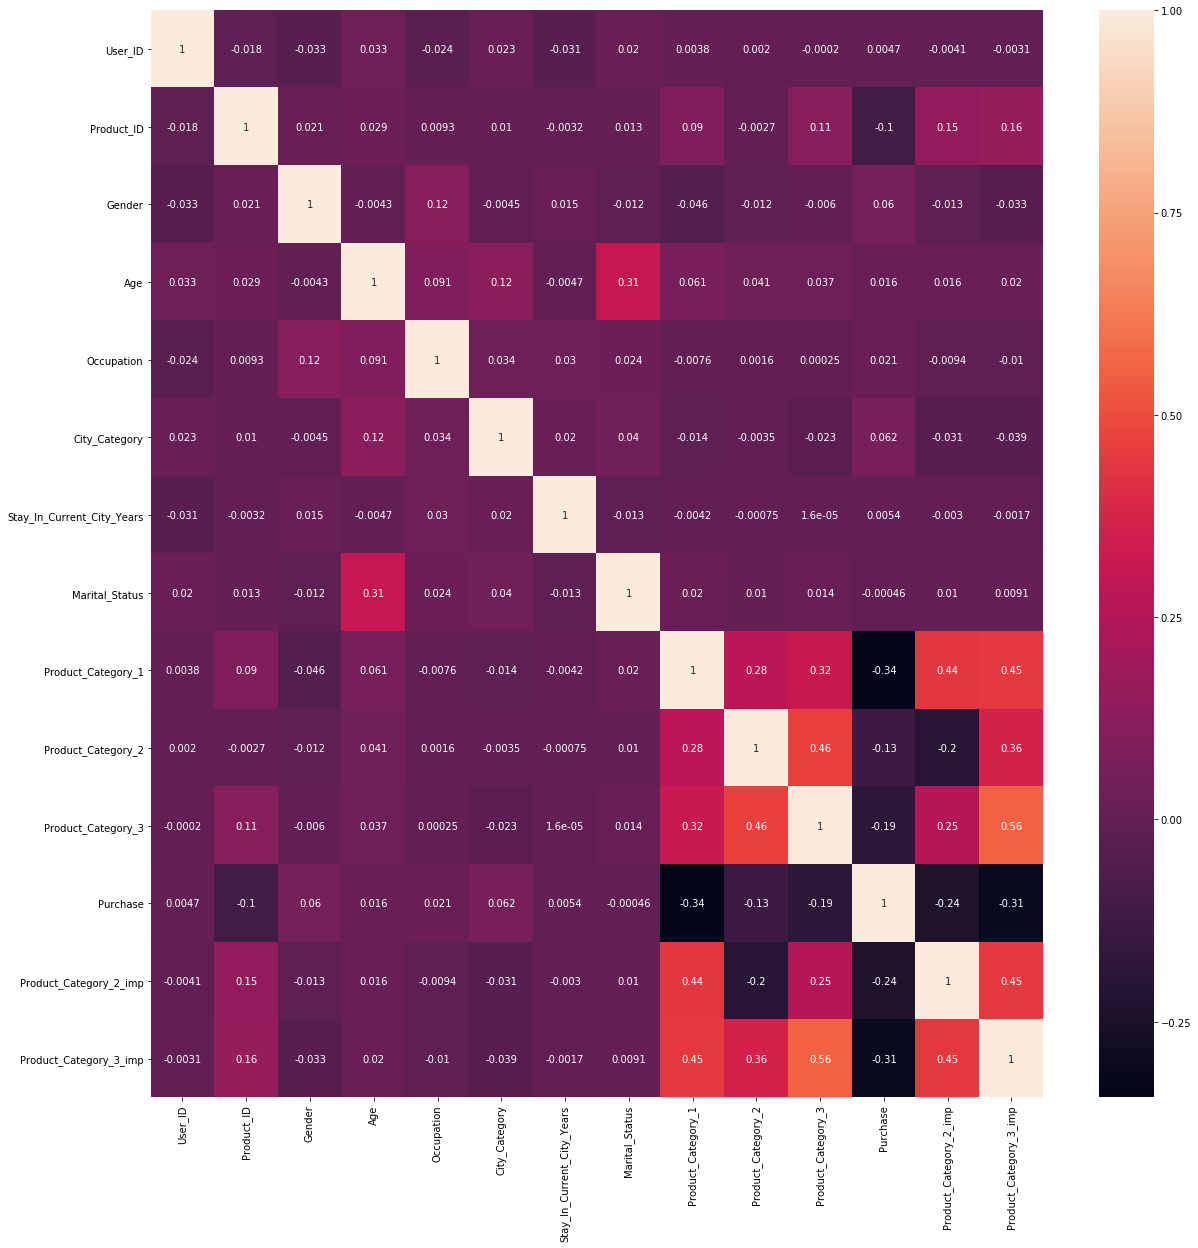

In [32]:
# For better size heatmap is plotted larger
corr = df_train.corr(method = "spearman")
top_corr_features = corr.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True)

In [33]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_2_imp,Product_Category_3_imp
0,0,-1.028774,0,-1.844248,0.294864,0,0.109801,0,-0.610809,-0.293605,0.368792,8370,1,1
1,0,0.722139,0,-1.844248,0.294864,0,0.109801,0,-1.118912,-0.759362,-0.361176,15200,0,0
2,0,-0.845799,0,-1.844248,0.294864,0,0.109801,0,1.675656,-0.293605,0.368792,1422,1,1
3,0,-0.869157,0,-1.844248,0.294864,0,0.109801,0,1.675656,1.103664,0.368792,1057,0,1
4,1,1.077382,1,2.588277,1.214734,2,1.660861,0,0.659449,-0.293605,0.368792,7969,1,1


In [34]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_Category_2_imp,Product_Category_3_imp
0,3,-0.445785,1,1.110769,-0.165072,1,0.109801,1,-1.118912,0.405029,0.368792,0,1
1,8,-0.596642,1,-0.366739,1.368046,2,-1.441258,0,-0.610809,-0.992240,0.368792,0,1
2,9,1.106580,0,0.372015,-1.084943,1,1.660861,1,-0.102705,1.103664,0.368792,0,1
3,9,-0.286169,0,0.372015,-1.084943,1,1.660861,1,-0.356757,-0.060727,0.368792,0,1
4,10,-1.176711,0,-0.366739,-1.084943,2,-0.665728,0,-0.356757,-0.992240,-1.091145,0,0


In [35]:
X = df_train.drop(['Purchase'], axis=1)
y =df_train[['Purchase']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:

xgb_reg = XGBRegressor(learning_rate=0.6, max_depth=8, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))

print (xgb_reg)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.6, max_delta_step=0, max_depth=8,
             min_child_weight=40, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [37]:
rmse

2529.5834766832413

In [38]:
sub= pd.read_csv("sample_submission_V9Inaty.csv")

In [39]:
sub["Purchase"] = xgb_reg.predict(df_test)

In [40]:
sub

,Purchase,User_ID,Product_ID
0,15762.006836,1000004,P00128942
1,12359.195312,1000009,P00113442
2,6048.107422,1000010,P00288442
3,3705.836914,1000010,P00145342
4,2077.779053,1000011,P00053842
...,...,...,...
233594,8044.389648,1006036,P00118942
233595,5468.454102,1006036,P00254642
233596,13686.708008,1006036,P00031842
233597,19262.246094,1006037,P00124742


In [41]:
sub.to_csv("BlackSales.csv", index= False)

In [42]:
sub1= pd.read_csv("BlackSales.csv")

In [43]:
sub1.head()

,Purchase,User_ID,Product_ID
0,15762.0070,1000004,P00128942
1,12359.1950,1000009,P00113442
2,6048.1074,1000010,P00288442
3,3705.8370,1000010,P00145342
4,2077.7790,1000011,P00053842
